# Clustering Problem 
## KMeans
### *What is A Cluster?*
A cluster refers to a collection of data points aggregated together because of certain similarities.
### *What is KMEANS?*
You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### *How KMeans Works?*
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
It halts creating and optimizing clusters when either:
* The centroids have stabilized — there is no change in their values because the clustering has been successful.
* The defined number of iterations has been achieved.


# KMeans Algorithm

In [1]:
# used for manipulating directory paths
import os
import numpy as np

import matplotlib.pyplot  as plt

from scipy.io import loadmat

import time

%matplotlib inline

In [2]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)
    idx = np.argmin( np.stack([np.abs(((X-centroids[i])**2).sum(axis=1)) for i in range(0,K)],axis=1),axis = 1)
    return idx

In [3]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    centroids = np.stack([X[idx==i].mean(axis= 0)for i in range(0,K)],axis= 0)
    return centroids

In [4]:
def runkMeans(X, centroids, findClosestCentroids, computeCentroids,
              max_iters=10,ploting=False):
    """
    Runs the K-means algorithm.

    Parameters
    ----------
    X : array_like
        The data set of size (m, n). Each row of X is a single example of n dimensions. The
        data set is a total of m examples.

    centroids : array_like
        Initial centroid location for each clusters. This is a matrix of size (K, n). K is the total
        number of clusters and n is the dimensions of each data point.

    findClosestCentroids : func
        A function (implemented by student) reference which computes the cluster assignment for
        each example.

    computeCentroids : func
        A function(implemented by student) reference which computes the centroid of each cluster.

    max_iters : int, optional
        Specifies the total number of interactions of K-Means to execute.


    Returns
    -------
    centroids : array_like
        A (K x n) matrix of the computed (updated) centroids.
    idx : array_like
        A vector of size (m,) for cluster assignment for each example in the dataset. Each entry
        in idx is within the range [0 ... K-1].

 
    """
    K = centroids.shape[0]
    idx = None
    idx_history = []
    centroid_history = []

    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)

        idx_history.append(idx)
        centroid_history.append(centroids)

        centroids = computeCentroids(X, idx, K)
        if ploting==True:
           plot(X[:,0],X[:,1],centroids,"Ploting Centroids while updating them")
        

    return centroids, idx, centroid_history,idx_history

In [5]:
def plot(x,y,centroids,title_plot):
      """
        Ploting Function used to plot the data with the centroids

        Args:
        ----------
            x: array-Like
            Containing the X-axis values
            y: array-Like
            Containing the Y-axis values
            centroids: array_like
              A (K x n) matrix of the computed (updated) centroids
      """
      plt.scatter(x,y)
      ## add final centriods
      plt.plot(centroids[0][0],centroids[0][1],marker="v",color='r')
      plt.plot(centroids[1][0],centroids[1][1],marker="v",color='k')
      plt.plot(centroids[2][0],centroids[2][1],marker="v",color='y')
      plt.legend(["C1","C2","C3"])
      plt.xlabel("X")
      plt.ylabel("Y")
      plt.title(title_plot);

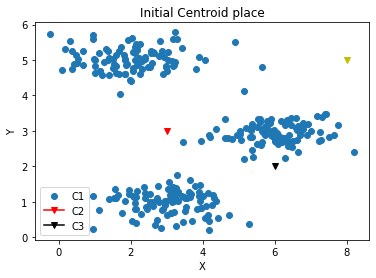

In [6]:

data = loadmat('ex7data2.mat')
X = data['X']
x=X[:,0]
y=X[:,1]
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
plot(x,y,initial_centroids,title_plot="Initial Centroid place")



Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


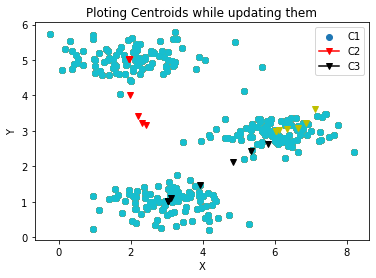

In [7]:
# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)
runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids,
              max_iters=10,ploting=True)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')


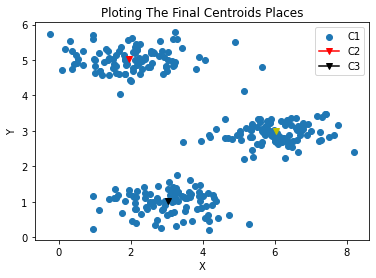

In [8]:
centroids, idx, centroid_history,idx_history=runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids,
              max_iters=10,ploting=False)
plot(x,y,centroids,"Ploting The Final Centroids Places")
